# Sentiment Analysis

In [1]:
# Read the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,transcript,movies
Trainspotting,Choose a career. Choose a family. Choose a f...,Trainspotting
The_Wrestler,"and a true American, the people's hero, Rand...",The_Wrestler
Whiplash,"No. Stay. What's your name? Andrew Neiman, ...",Whiplash
Coco,Because of something that happened\nbefore I w...,Coco
Rocky,You're waltzin'. Give the sucker some action....,Rocky
Oldboy,has been digitally remastered to celebrate it...,Oldboy


In [2]:
# Create lambda functions to find polarity and subjectivity of each routine
from textblob import TextBlob
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,movies,polarity,subjectivity
Trainspotting,Choose a career. Choose a family. Choose a f...,Trainspotting,-0.009765,0.554811
The_Wrestler,"and a true American, the people's hero, Rand...",The_Wrestler,0.123852,0.515585
Whiplash,"No. Stay. What's your name? Andrew Neiman, ...",Whiplash,0.066273,0.529901
Coco,Because of something that happened\nbefore I w...,Coco,0.162964,0.521879
Rocky,You're waltzin'. Give the sucker some action....,Rocky,0.148852,0.522421
Oldboy,has been digitally remastered to celebrate it...,Oldboy,0.087952,0.488268


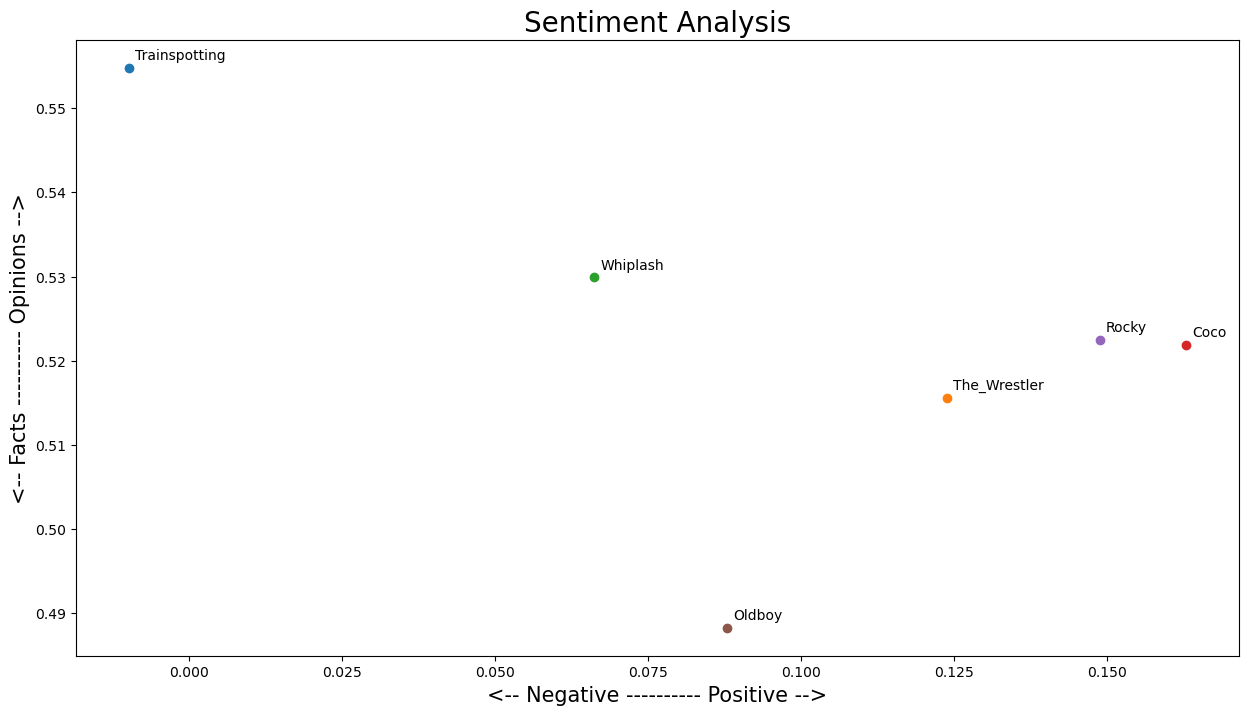

In [7]:
# Plot results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [15, 8]

for index, movie in enumerate(data.index):
    x = data.polarity.loc[movie]
    y = data.subjectivity.loc[movie]
    plt.scatter(x, y)
    plt.text(x+.001, y+.001, data['movies'][index], fontsize=10)
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative ---------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts ---------- Opinions -->', fontsize=15)

plt.show()

# Sentiment of Routine Over Time

In [8]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with default of 10 equal parts.'''
    
    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally size pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece] + size])
    return split_list

In [9]:
# Look at data
data

,transcript,movies,polarity,subjectivity
Trainspotting,Choose a career. Choose a family. Choose a f...,Trainspotting,-0.009765,0.554811
The_Wrestler,"and a true American, the people's hero, Rand...",The_Wrestler,0.123852,0.515585
Whiplash,"No. Stay. What's your name? Andrew Neiman, ...",Whiplash,0.066273,0.529901
Coco,Because of something that happened\nbefore I w...,Coco,0.162964,0.521879
Rocky,You're waltzin'. Give the sucker some action....,Rocky,0.148852,0.522421
Oldboy,has been digitally remastered to celebrate it...,Oldboy,0.087952,0.488268


In [11]:
# List to hold all pices of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[[" Choose a career. Choose a family.  Choose a fucking big television.  Choose washing machines, cars, compact disc players, electrical tin openers.  Choose good health, low cholesterol and dental insurance.  Choose fixed-interest mortgage repayments.  Choose a starter home.  Choose your friends.  Choose leisure wear and matching luggage.  Choose a three-piece suite on hire purchase in a range of fucking fabrics.  Choose DIY and wondering who the fuck you are on a Sunday morning.    Choose sitting on that couch  watching mind-numbing, spirit-crushing game shows  stuffing fucking junk food into your mouth.  Tommy, go!  Choose rotting away at the end of it all,  pissing your last in a miserable home,  nothing more than an embarrassment to the selfish, fucked-up brats  that you've spawned to replace yourself.  Choose your future. Choose life.  But why would I want to do a thing like that?  I chose not to choose life. I chose something else. And the reasons?  There are no reasons.  Who ne

In [12]:
# Check how many elements
len(list_pieces)

6

In [ ]:
# Check how many pieces of text for each episode
len(list_pieces[0])

In [13]:
# Calculate the polarity for each piece of text
polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)

polarity_transcript

[[0.0034851621808143526,
  0.024322750662036367,
  -0.06053619238860206,
  0.09915545433402578,
  -0.08249503968253968,
  -0.08611751152073735,
  0.1275800588300588,
  -0.08686330253494433,
  -0.010944846292947574,
  -0.06190441573017331],
 [0.15898866758241764,
  0.16056477755421414,
  0.16160665367396138,
  0.04290825885583945,
  0.23835750861792526,
  0.2504737103174603,
  0.154750566893424,
  -0.030506448412698412,
  -0.037424414613840856,
  0.2773756636815941],
 [0.16225005153576577,
  0.15561682674963925,
  0.0002857142857142638,
  0.004113300492610845,
  0.12613311688311687,
  0.22414221580888252,
  -0.10393020607864355,
  -0.2004140786749483,
  0.19478453364817003,
  0.13387168387168388],
 [0.2429918822496947,
  0.17107215195105818,
  0.10325825216450216,
  0.042698412698412694,
  0.22988413295487944,
  0.18155665691417808,
  0.11820003478328674,
  0.1421816549716629,
  0.173419278425656,
  0.2298157858381346],
 [0.2482945679356812,
  0.18031374007936507,
  0.0755009832215715,


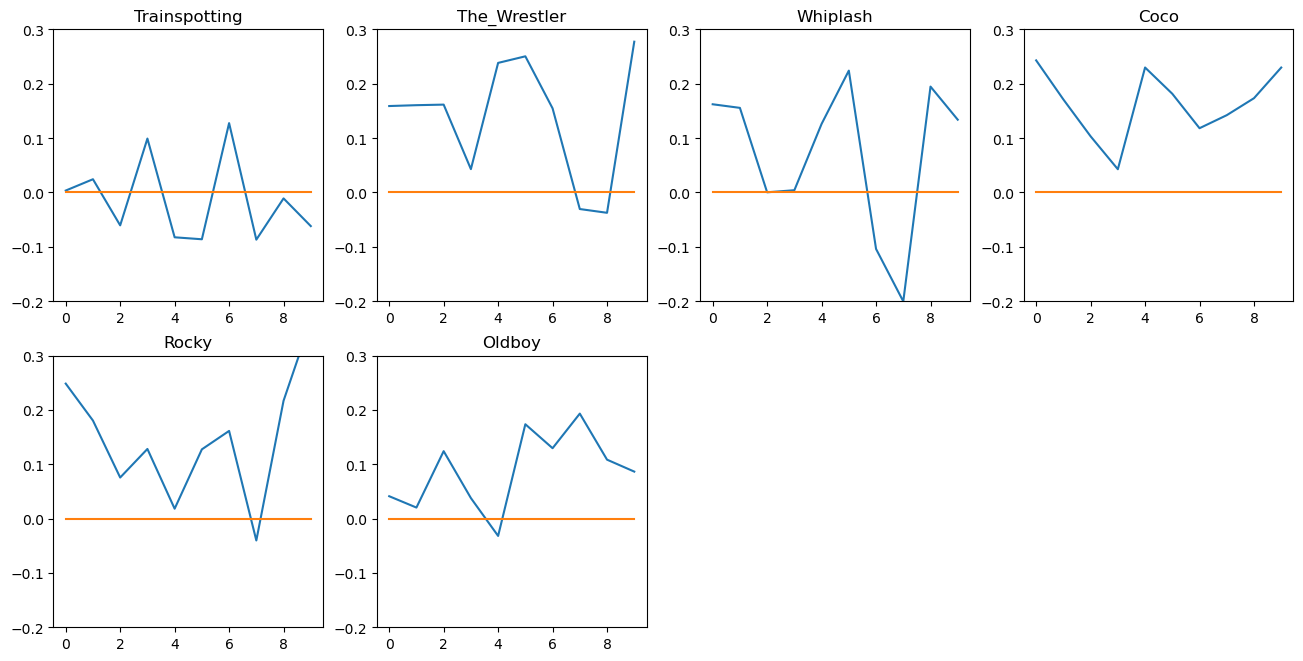

In [15]:
# Show the plot for all episodes
plt.rcParams['figure.figsize'] = [16, 12]

for index, movie in enumerate(data.index):
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0, 10), np.zeros(10))
    plt.title(data['movies'][index])
    plt.ylim(bottom=-.2, top=.3)
    
plt.show()